In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
russian_stopwords = stopwords.words("russian")

Dataset initialization

In [2]:
main_dataset = pd.read_csv("russianPoetryWithTheme.csv")

In [3]:
main_dataset.head()

,author,date_from,text,name,date_to,themes/item/0,themes/item/1,themes/item/2,themes/item/3
0,Михаил Лермонтов,1829.0,"Забывши волнения жизни мятежной,\r\nОдин жил в...",Забывши волнения жизни мятежной...,1829.0,NaN,NaN,NaN,NaN
1,Сергей Есенин,1917.0,"Нивы сжаты, рощи голы,\r\nОт воды туман и сыро...","Нивы сжаты, рощи голы...",1918.0,NaN,NaN,NaN,NaN
2,Игорь Северянин,1919.0,Лючинь печальная читала вечером ручьисто-вкрад...,ЧАРЫ ЛЮЧИНЬ,1919.0,NaN,NaN,NaN,NaN
3,Анатолий Жигулин,1963.0,"Глыбу кварца разбили молотом,\r\nИ, веселым ог...",Золото,1963.0,NaN,NaN,NaN,NaN
4,Николай Тихонов,1937.0,"Хлынул дождь, когда девушки, встав в хоровод,\...",Хоровод в Сульдуси,1940.0,NaN,NaN,NaN,NaN


Dataset statistics:<br/>
 Symbols: **13208090**<br/>
 Words: **2186827**<br/>
 Poems: **16694**<br/>
 Poems with defined theme: **3904**<br/>
 Authors: **195**<br/>
 Source : [GitHub](https://github.com/IlyaGusev/PoetryCorpus)

Let's make templates

In [4]:
def makeBar(content,title,first_key,second_key):
    random.seed(100)
    all_colors = list(plt.cm.colors.cnames.keys())
    c = random.choices(all_colors, k=len(content) + 1)
    plt.figure(figsize=(15, 5), dpi=80)
    plt.bar(content[first_key], content[second_key], color=c, width=0.6)
    plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')
    plt.ylabel("Count")
    plt.title(title)

In [5]:
def makeBigBar(content,title,first_key,second_key):
    random.seed(100)
    all_colors = list(plt.cm.colors.cnames.keys())
    c = random.choices(all_colors, k=len(content) + 1)
    plt.figure(figsize=(100, 5), dpi=80)
    plt.bar(content[first_key], content[second_key], color=c, width=0.6)
    plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')
    plt.ylabel(second_key)
    plt.title(title)

In [6]:
def makeWordCloud(content,title):
    wordcloud = WordCloud(max_words = 200,max_font_size=50,stopwords=russian_stopwords,background_color='white').generate(" ".join(content))
    plt.figure(figsize=(16, 13))
    plt.title(title, fontsize=20)
    plt.imshow(wordcloud.recolor(colormap='Pastel2'), interpolation='bilinear')
    plt.axis("off")


In [7]:
def clearFromStopWords(words,key):
    words = words[~words[key].str.lower().isin(russian_stopwords)]
    words = words[~words[key].str.contains(',','.')]
    return words


Let's look at the writers who are represented in this dataset

In [8]:
writers = main_dataset.author.value_counts()
writers = pd.DataFrame(writers)
writers.reset_index(level=0,inplace=True)
writers.rename(columns={"index":"Writer","author":"Count"},inplace=True)
writers

,Writer,Count
0,Владимир Высоцкий,539
1,Александр Пушкин,401
2,Александр Блок,286
3,Анна Ахматова,277
4,Афанасий Фет,251
...,...,...
190,Владимир Лившиц,5
191,Алексей Ржевский,2
192,Евгений Гребенка,2
193,Владислав Крапивин,2


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


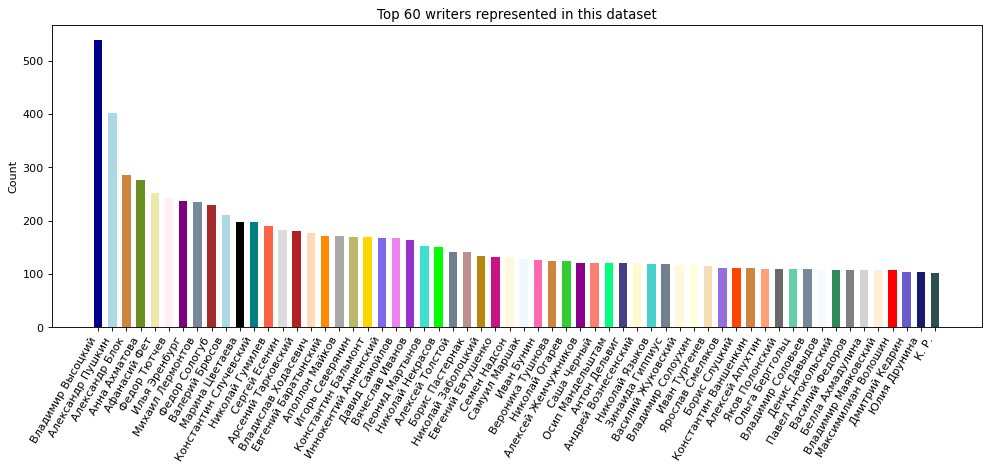

In [9]:
makeBar(writers[:60],"Top 60 writers represented in this dataset","Writer","Count")

<ipython-input-5-3ab4b52ef20d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


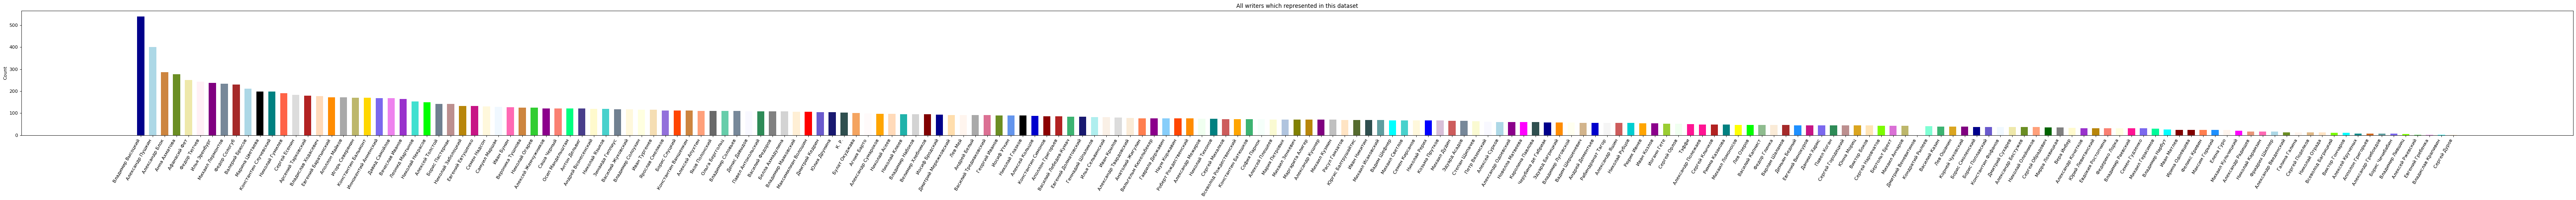

In [10]:
makeBigBar(writers,"All writers which represented in this dataset","Writer","Count")

Let's check poems with defined theme

In [11]:
poems_with_theme = main_dataset[(pd.isna(main_dataset['themes/item/0']) == False)]
poems_with_theme.head()

,author,date_from,text,name,date_to,themes/item/0,themes/item/1,themes/item/2,themes/item/3
12,Лев Мей,1862.0,"Итак, вы ждете от меня\r\nПисьма по-русски для...",Забытые ямбы,1862.0,О любви,NaN,NaN,NaN
18,Ярослав Смеляков,NaN,"Шумел снежок над позднею Москвой,\r\nгудел нар...",На вокзале,NaN,Военные,NaN,NaN,NaN
23,Денис Давыдов,1804.0,"В дымном поле, на биваке\r\nУ пылающих огней,\...","Бурцову (В дымном поле, на биваке...)",1804.0,Военные,NaN,NaN,NaN
30,Андрей Дементьев,NaN,Непишущий поэт — осенний соловей...\r\nКак оты...,Другу юности,NaN,О дружбе,NaN,NaN,NaN
38,Михаил Лермонтов,1830.0,Благодарю!.. Вчера мое признанье\r\nИ стих мой...,Благодарю!,1830.0,О любви,NaN,NaN,NaN


In [12]:
theme_info = poems_with_theme['themes/item/0'].value_counts()
theme_info = pd.DataFrame(theme_info)
theme_info.reset_index(level=0,inplace=True)
theme_info.rename(columns={'index':'Theme','themes/item/0':'Count'},inplace=True)
theme_info

,Theme,Count
0,О любви,2817
1,Военные,592
2,Детские,106
3,О дружбе,103
4,О природе,71
5,О животных,54
6,Патриотические,44
7,Посвящения,38
8,Спортивные,28
9,Про море,12


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


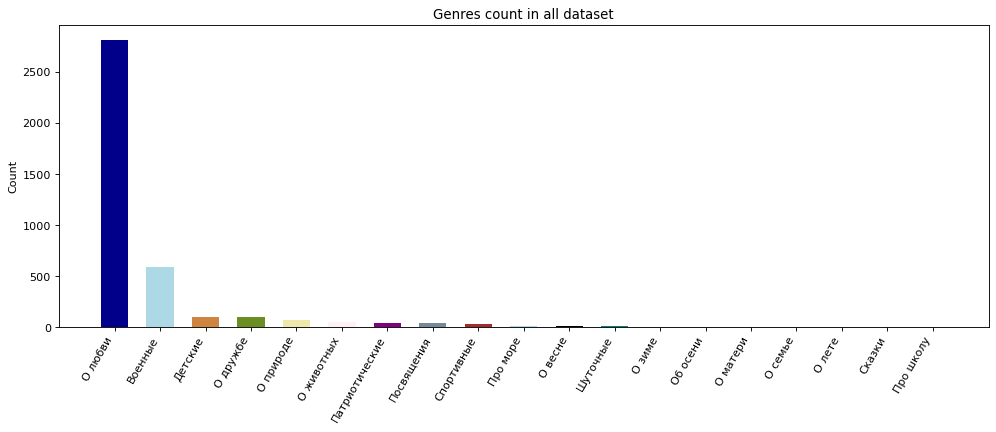

In [13]:
makeBar(theme_info,"Genres count in all dataset","Theme","Count")

Poems about love predominate significantly

The most used words

In [14]:
words = main_dataset['text'].str.split(expand=True).unstack().value_counts()

In [15]:
words = pd.DataFrame(words).reset_index(level=0)
words.rename(columns={'index':'Word',0:'Count'},inplace=True)


clearing of signs

In [16]:
words = words[
    (((words['Word'] >= 'А') & (words['Word'] <= 'Я')) | ((words['Word'] >= 'а') & (words['Word'] <= 'я')))]
words

,Word,Count
0,и,51162
1,в,50626
2,И,45576
3,не,32978
5,на,22794
...,...,...
369780,цинка!,1
369781,"фасадов,",1
369782,кокетны,1
369783,водка.,1


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


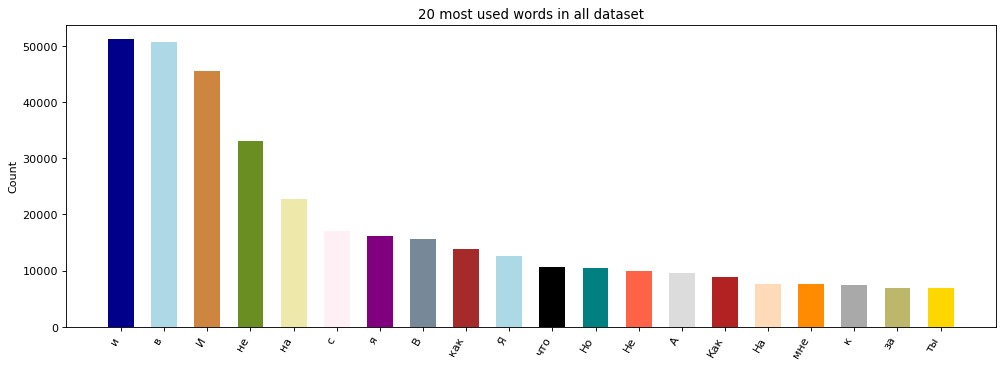

In [17]:
makeBar(words[:20],"20 most used words in all dataset","Word","Count")

As usually short words like prepositions and personal pronouns in top. Let's delete them and check again

In [18]:
words = clearFromStopWords(words,"Word")
words

,Word,Count
56,это,2568
67,нам,2261
70,сердце,2209
76,тебе,1889
83,б,1712
...,...,...
369775,томным.,1
369777,коснулся?,1
369780,цинка!,1
369782,кокетны,1


This is already more interesting!

<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


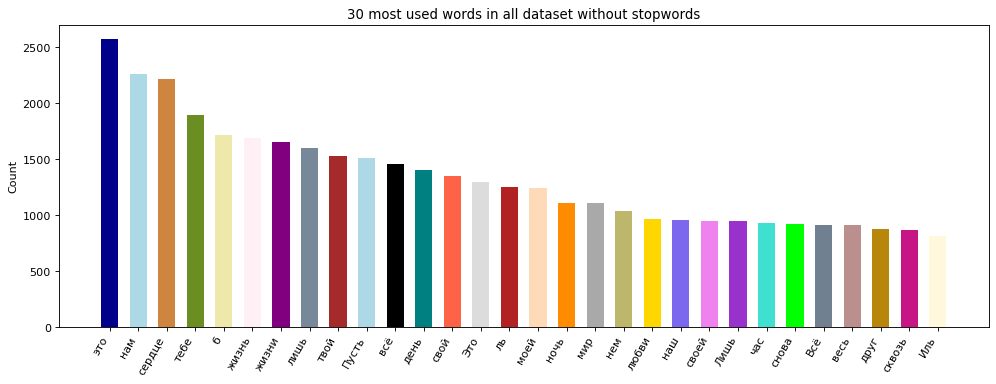

In [19]:
makeBar(words[:30],"30 most used words in all dataset without stopwords","Word","Count")

Let's make word cloud

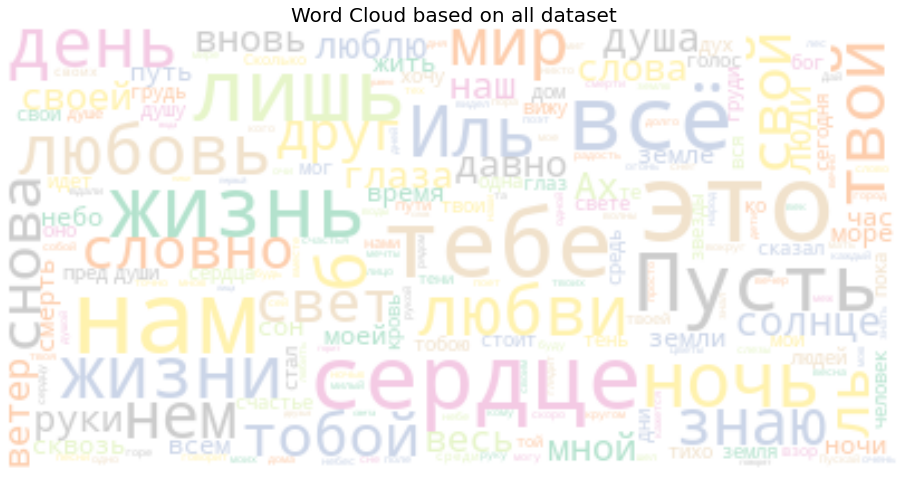

In [20]:
makeWordCloud(main_dataset.text,"Word Cloud based on all dataset")

Something can be explained by the fact that poems about love predominate in the dataset :)

Let's divide our dataset by the age when the poem was written and take the end date of writing for this age

In [21]:
main_dataset.date_to.info()

<class 'pandas.core.series.Series'>
RangeIndex: 16694 entries, 0 to 16693
Series name: date_to
Non-Null Count  Dtype  
--------------  -----  
12857 non-null  float64
dtypes: float64(1)
memory usage: 130.5 KB


Selection size wiil be 12857

In [22]:
main_dataset.date_to.describe()

count    12857.000000
mean      1900.789375
std         53.397843
min       1725.000000
25%       1856.000000
50%       1913.000000
75%       1942.000000
max       1996.000000
Name: date_to, dtype: float64

As you can see, the dataset presents 3 centuries let's divide

In [23]:
eighteenth_century = main_dataset[ (main_dataset.date_to>=1700) & (main_dataset.date_to<=1799)]
eighteenth_century.head()

,author,date_from,text,name,date_to,themes/item/0,themes/item/1,themes/item/2,themes/item/3
36,Иоганн Гете,1768.0,"Покидаю домик скромный,\r\nГде моей любимой кр...",Прекрасная ночь,1768.0,NaN,NaN,NaN,NaN
39,Михаил Ломоносов,1761.0,"Я долго размышлял и долго был в сомненье,\r\nЧ...",Я долго размышлял и долго был в сомненье...,1761.0,NaN,NaN,NaN,NaN
114,Александр Сумароков,1759.0,"Трудится тот вотще,\r\nКто разумом своим лишь ...",Недостаток изображения,1759.0,О любви,NaN,NaN,NaN
155,Александр Сумароков,1760.0,"Как будто наяву,\r\nЯ видел сон дурацкий:\r\nП...",Сон (Как будто наяву...),1760.0,NaN,NaN,NaN,NaN
182,Василий Тредиаковский,1730.0,Во един день прошлого в город Гамбург лета\r\n...,Стихи эпиталамеческие (Во един день прошлого...),1730.0,О любви,NaN,NaN,NaN


In [24]:
nineteenth_century = main_dataset[ (main_dataset.date_to>=1800) & (main_dataset.date_to<=1899)]
nineteenth_century.head()

,author,date_from,text,name,date_to,themes/item/0,themes/item/1,themes/item/2,themes/item/3
0,Михаил Лермонтов,1829.0,"Забывши волнения жизни мятежной,\r\nОдин жил в...",Забывши волнения жизни мятежной...,1829.0,NaN,NaN,NaN,NaN
6,Алексей Толстой,1856.0,"В стране лучей, незримой нашим взорам,\r\nВокр...","В стране лучей, незримой нашим взорам...",1856.0,NaN,NaN,NaN,NaN
11,Федор Тютчев,1865.0,"Ночное небо так угрюмо,\r\nЗаволокло со всех с...",Ночное небо так угрюмо...,1865.0,NaN,NaN,NaN,NaN
12,Лев Мей,1862.0,"Итак, вы ждете от меня\r\nПисьма по-русски для...",Забытые ямбы,1862.0,О любви,NaN,NaN,NaN
13,Михаил Лермонтов,1831.0,Середниково. Ночью; у окна.\r\nЕсть место: бли...,Завещание,1831.0,NaN,NaN,NaN,NaN


In [25]:
twentieth_century = main_dataset[ (main_dataset.date_to>=1900) & (main_dataset.date_to<=1999)]
twentieth_century.head()

,author,date_from,text,name,date_to,themes/item/0,themes/item/1,themes/item/2,themes/item/3
1,Сергей Есенин,1917.0,"Нивы сжаты, рощи голы,\r\nОт воды туман и сыро...","Нивы сжаты, рощи голы...",1918.0,NaN,NaN,NaN,NaN
2,Игорь Северянин,1919.0,Лючинь печальная читала вечером ручьисто-вкрад...,ЧАРЫ ЛЮЧИНЬ,1919.0,NaN,NaN,NaN,NaN
3,Анатолий Жигулин,1963.0,"Глыбу кварца разбили молотом,\r\nИ, веселым ог...",Золото,1963.0,NaN,NaN,NaN,NaN
4,Николай Тихонов,1937.0,"Хлынул дождь, когда девушки, встав в хоровод,\...",Хоровод в Сульдуси,1940.0,NaN,NaN,NaN,NaN
7,Сергей Городецкий,1907.0,"Жутко мне от вешней радости,\r\nОт воздушной э...",Веснянка,1907.0,NaN,NaN,NaN,NaN


In [26]:
print("18 century size:", len(eighteenth_century))
print("19 century size:", len(nineteenth_century))
print("20 century size:", len(twentieth_century))

18 century size: 366
19 century size: 4607
20 century size: 7884


Let's check previous things for every century

18th century

18th century writers represented in this dataset

In [27]:
writers_eighteenth = eighteenth_century.author.value_counts()
writers_eighteenth = pd.DataFrame(writers_eighteenth)
writers_eighteenth.reset_index(level=0,inplace=True)
writers_eighteenth.rename(columns={"index":"Writer","author":"Count"},inplace=True)
writers_eighteenth

,Writer,Count
0,Василий Тредиаковский,90
1,Александр Сумароков,87
2,Гаврила Державин,55
3,Иоганн Гете,41
4,Михаил Ломоносов,41
5,Николай Карамзин,16
6,Фридрих Шиллер,15
7,Александр Радищев,10
8,Василий Капнист,5
9,Иван Крылов,3


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


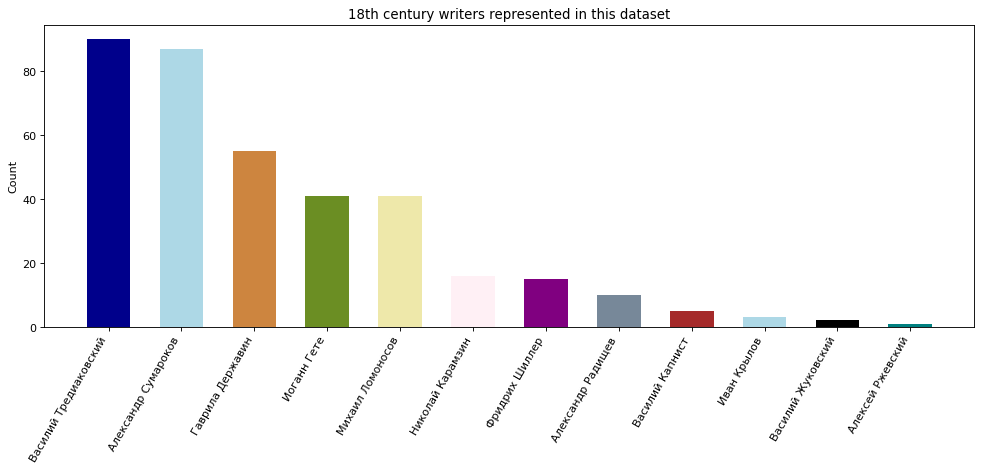

In [28]:
makeBar(writers_eighteenth,"18th century writers represented in this dataset","Writer","Count")

Themes of the 18th century poems which defined

In [29]:
theme_info_eighteenth = eighteenth_century['themes/item/0'].value_counts()
theme_info_eighteenth  = pd.DataFrame(theme_info_eighteenth )
theme_info_eighteenth.reset_index(level=0,inplace=True)
theme_info_eighteenth.rename(columns={'index':'Theme','themes/item/0':'Count'},inplace=True)
theme_info_eighteenth

,Theme,Count
0,О любви,135
1,Патриотические,5
2,Военные,5
3,О дружбе,3
4,О животных,1


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


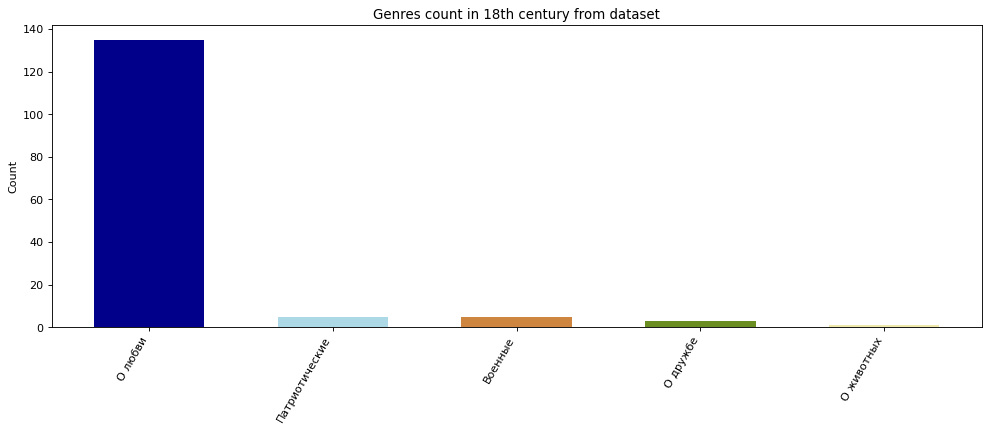

In [30]:
makeBar(theme_info_eighteenth,"Genres count in 18th century from dataset","Theme","Count")

The most used word in the poems of the 18th century

In [31]:
words_eighteenth = eighteenth_century['text'].str.split(expand=True).unstack().value_counts()
words_eighteenth = pd.DataFrame(words_eighteenth).reset_index(level=0)
words_eighteenth.rename(columns={'index':'Word',0:'Count'},inplace=True)
words_eighteenth

,Word,Count
0,в,1831
1,и,1498
2,И,1388
3,не,1022
4,с,597
...,...,...
29620,грезить,1
29621,"Проклинаю,",1
29622,вернейший,1
29623,стращает,1


Excluding stopwords

In [32]:
words_eighteenth = clearFromStopWords(words_eighteenth,"Word")
words_eighteenth = words_eighteenth[2:]
words_eighteenth

,Word,Count
44,сей,130
45,нам,129
49,сердце,122
51,тебе,116
53,лишь,108
...,...,...
29618,тонем,1
29620,грезить,1
29622,вернейший,1
29623,стращает,1


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


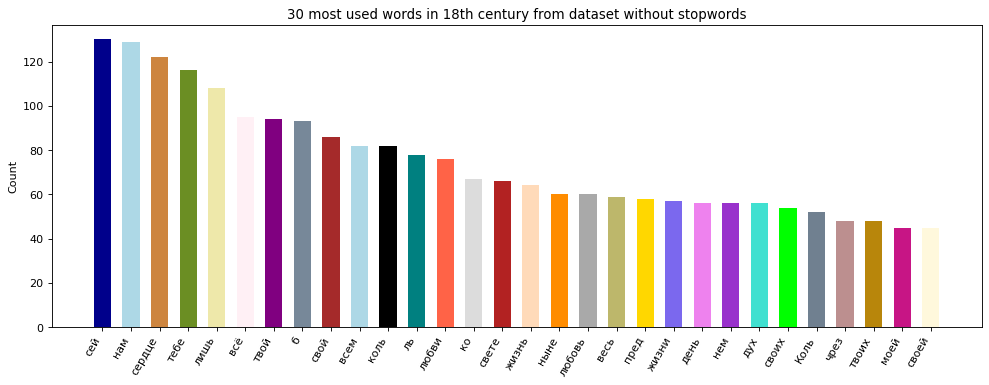

In [33]:
makeBar(words_eighteenth[:30],"30 most used words in 18th century from dataset without stopwords","Word","Count")

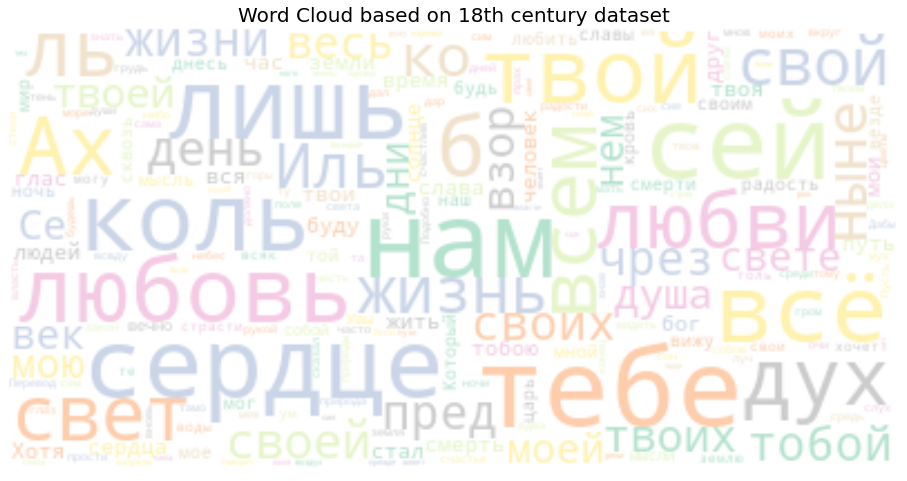

In [34]:
makeWordCloud(eighteenth_century.text,"Word Cloud based on 18th century dataset")

19th century

19th century writers represented in this dataset

In [35]:
writers_nineteenth = nineteenth_century.author.value_counts()
writers_nineteenth = pd.DataFrame(writers_nineteenth)
writers_nineteenth.reset_index(level=0,inplace=True)
writers_nineteenth.rename(columns={"index":"Writer","author":"Count"},inplace=True)
writers_nineteenth

,Writer,Count
0,Александр Пушкин,400
1,Федор Тютчев,237
2,Афанасий Фет,233
3,Михаил Лермонтов,217
4,Аполлон Майков,168
...,...,...
58,Вячеслав Иванов,3
59,Максим Горький,3
60,Евгений Гребенка,2
61,Велимир Хлебников,1


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


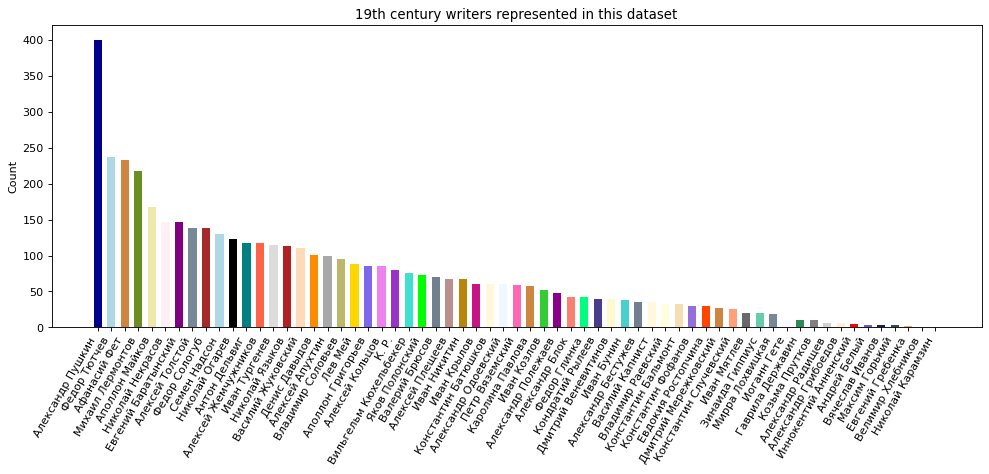

In [36]:
makeBar(writers_nineteenth,"19th century writers represented in this dataset","Writer","Count")

Themes of the 19th century poems which defined

In [37]:
theme_info_nineteenth = nineteenth_century['themes/item/0'].value_counts()
theme_info_nineteenth  = pd.DataFrame(theme_info_nineteenth )
theme_info_nineteenth.reset_index(level=0,inplace=True)
theme_info_nineteenth.rename(columns={'index':'Theme','themes/item/0':'Count'},inplace=True)
theme_info_nineteenth

,Theme,Count
0,О любви,1260
1,Военные,52
2,О дружбе,51
3,О животных,35
4,Посвящения,29
5,О природе,25
6,Патриотические,14
7,Про море,4
8,О весне,4
9,Шуточные,2


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


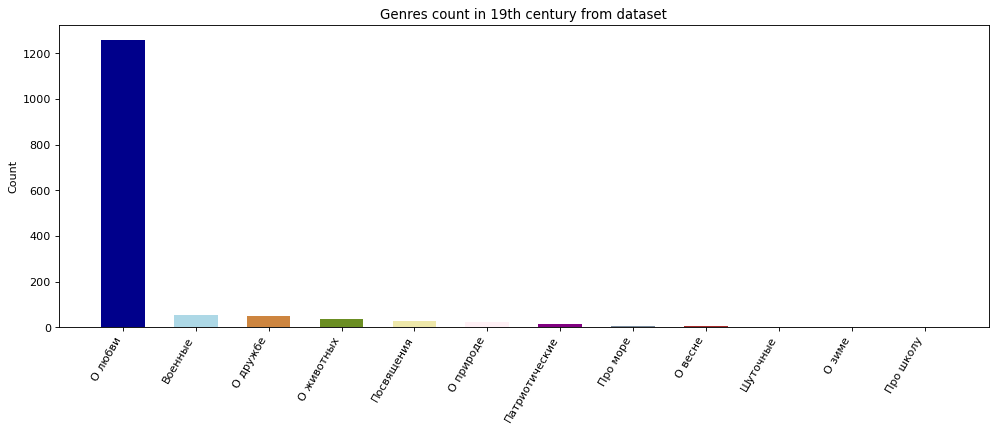

In [38]:
makeBar(theme_info_nineteenth,"Genres count in 19th century from dataset","Theme","Count")

The most used word in the poems of the 19th century

In [39]:
words_nineteenth = nineteenth_century['text'].str.split(expand=True).unstack().value_counts()
words_nineteenth = pd.DataFrame(words_nineteenth).reset_index(level=0)
words_nineteenth.rename(columns={'index':'Word',0:'Count'},inplace=True)
words_nineteenth

,Word,Count
0,И,14960
1,и,14881
2,в,13362
3,не,8398
4,с,5583
...,...,...
142185,вороного.,1
142186,безумные!,1
142187,тронувши,1
142188,мирского;,1


In [40]:
words_nineteenth = clearFromStopWords(words_nineteenth,"Word")
words_nineteenth = words_nineteenth[3:]
words_nineteenth

,Word,Count
54,сердце,847
63,всё,707
64,жизни,705
65,нам,704
66,твой,702
...,...,...
142185,вороного.,1
142186,безумные!,1
142187,тронувши,1
142188,мирского;,1


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


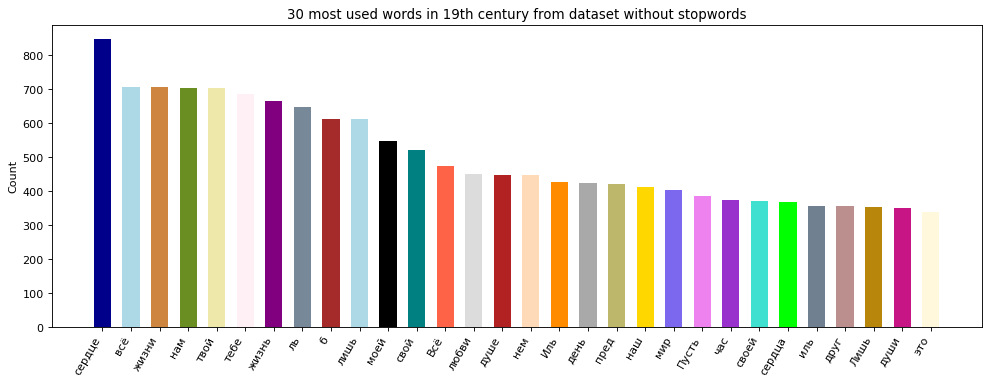

In [41]:
makeBar(words_nineteenth[:30],"30 most used words in 19th century from dataset without stopwords","Word","Count")

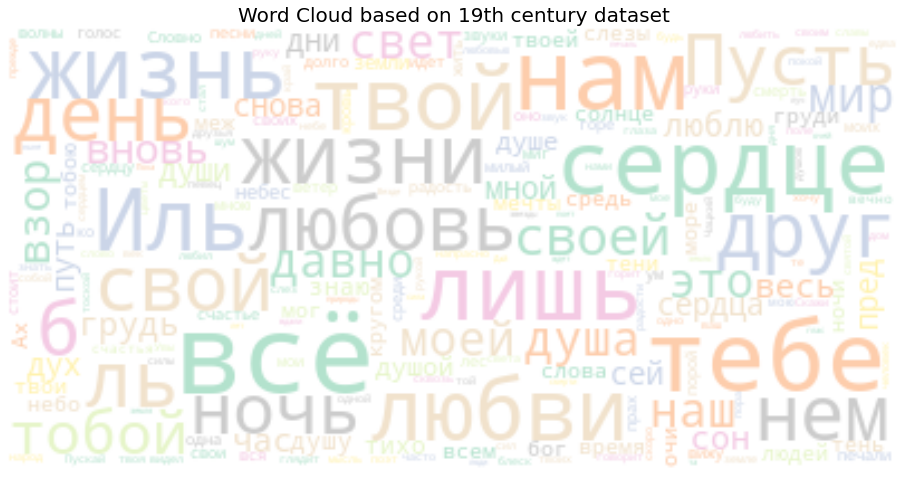

In [42]:
makeWordCloud(nineteenth_century.text,"Word Cloud based on 19th century dataset")

20th century

20th century writers represented in this dataset

In [43]:
writers_twentieth = twentieth_century.author.value_counts()
writers_twentieth = pd.DataFrame(writers_twentieth)
writers_twentieth.reset_index(level=0,inplace=True)
writers_twentieth.rename(columns={"index":"Writer","author":"Count"},inplace=True)
writers_twentieth

,Writer,Count
0,Владимир Высоцкий,537
1,Анна Ахматова,270
2,Александр Блок,229
3,Илья Эренбург,209
4,Сергей Есенин,179
...,...,...
132,Борис Поплавский,1
133,Алексей Крученых,1
134,Владимир Соловьев,1
135,Александр Кочетков,1


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


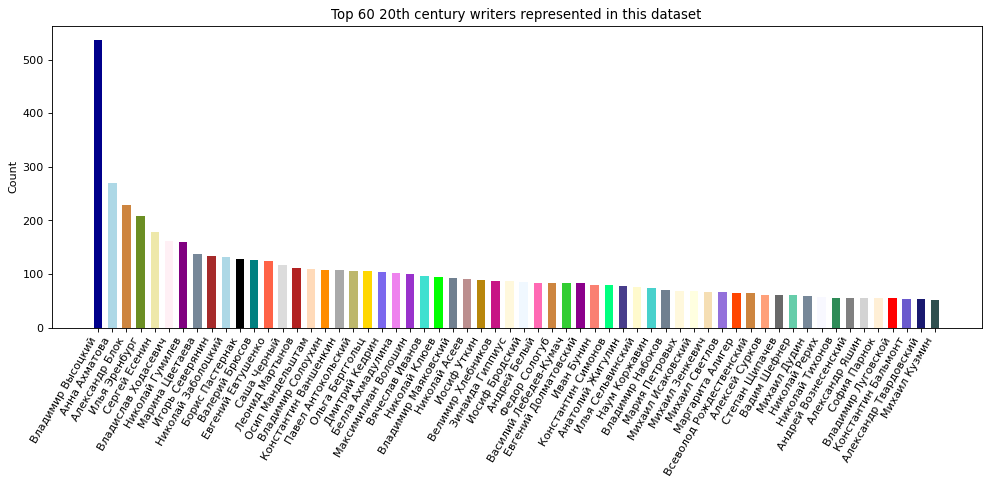

In [44]:
makeBar(writers_twentieth[:60],"Top 60 20th century writers represented in this dataset","Writer","Count")

<ipython-input-5-3ab4b52ef20d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


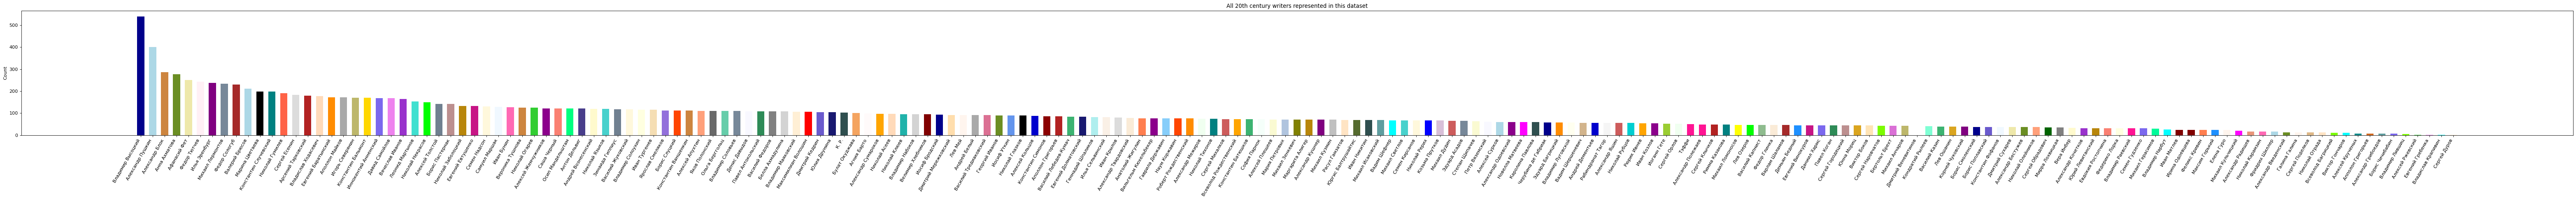

In [45]:
makeBigBar(writers,"All 20th century writers represented in this dataset","Writer","Count")

Themes of the 20th century poems which defined

In [46]:
theme_info_twentieth = twentieth_century['themes/item/0'].value_counts()
theme_info_twentieth  = pd.DataFrame(theme_info_twentieth )
theme_info_twentieth .reset_index(level=0,inplace=True)
theme_info_twentieth.rename(columns={'index':'Theme','themes/item/0':'Count'},inplace=True)
theme_info_twentieth

,Theme,Count
0,О любви,984
1,Военные,382
2,Детские,34
3,О дружбе,30
4,Спортивные,21
5,Патриотические,21
6,О природе,13
7,Посвящения,8
8,О животных,7
9,Про море,6


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


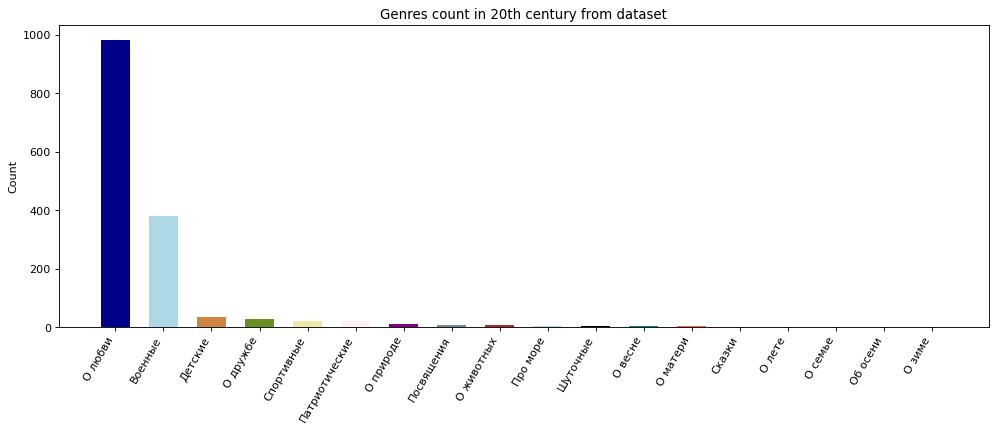

In [47]:
makeBar(theme_info_twentieth,"Genres count in 20th century from dataset","Theme","Count")

The most used word in the poems of the 20th century

In [48]:
words_twentieth = twentieth_century['text'].str.split(expand=True).unstack().value_counts()
words_twentieth = pd.DataFrame(words_twentieth).reset_index(level=0)
words_twentieth.rename(columns={'index':'Word',0:'Count'},inplace=True)

In [49]:
words_twentieth =  clearFromStopWords(words_twentieth,"Word")
words_twentieth = words_twentieth[3:]
words_twentieth

,Word,Count
46,это,1566
69,нам,1007
82,сердце,850
84,Это,823
86,Пусть,804
...,...,...
230089,замечательные,1
230091,Питер,1
230092,Укор,1
230093,Прометея?,1


<ipython-input-4-15a8da6e3342>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(content[first_key], rotation=60, horizontalalignment='right')


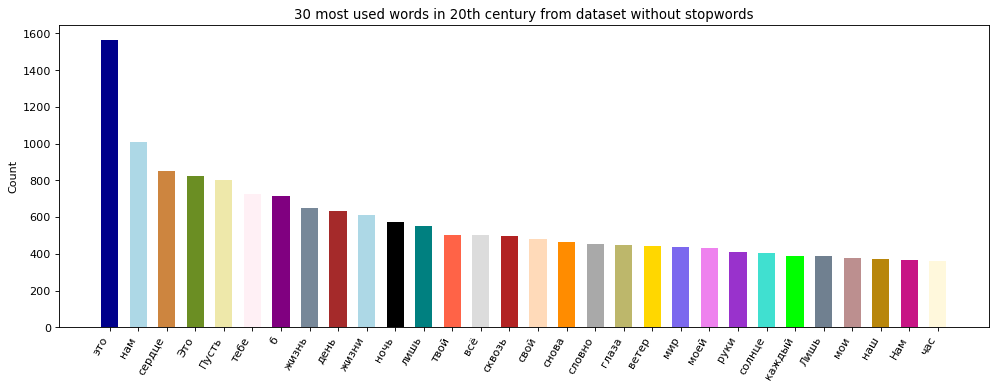

In [50]:
makeBar(words_twentieth[:30],"30 most used words in 20th century from dataset without stopwords","Word","Count")

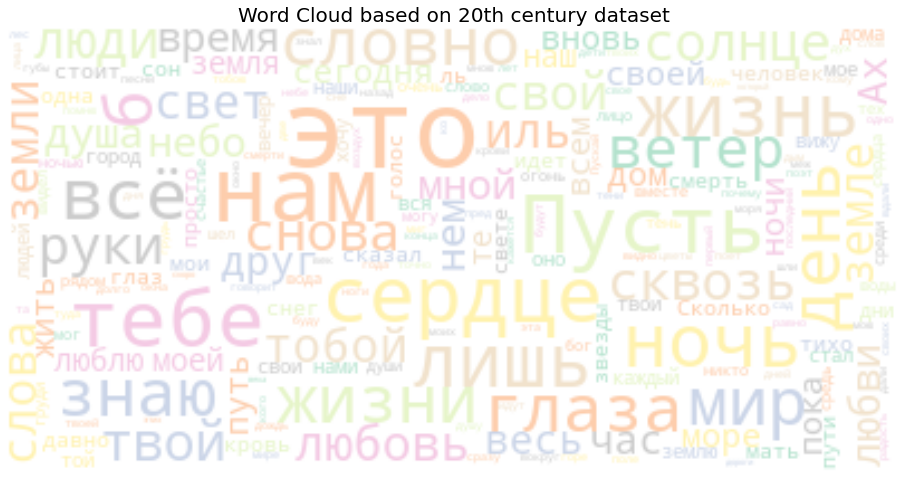

In [51]:
makeWordCloud(twentieth_century.text,"Word Cloud based on 20th century dataset")